<a href="https://colab.research.google.com/github/jglasgo2/BUS60095/blob/main/Assignment2_BUS60095_Glasgow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

**Text Analysis and NLP**

**By: Jeremy Glasgow**

1. Data Acquisition

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
pathToCsv = '/content/drive/MyDrive/complaints-cfpb-1.csv'
data = pd.read_csv(pathToCsv)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79973 entries, 0 to 79972
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 79973 non-null  object 
 1   Product                       79973 non-null  object 
 2   Sub-product                   79973 non-null  object 
 3   Issue                         79973 non-null  object 
 4   Sub-issue                     79662 non-null  object 
 5   Consumer complaint narrative  79973 non-null  object 
 6   Company public response       51328 non-null  object 
 7   Company                       79973 non-null  object 
 8   State                         79706 non-null  object 
 9   ZIP code                      79973 non-null  object 
 10  Tags                          4432 non-null   object 
 11  Consumer consent provided?    79973 non-null  object 
 12  Submitted via                 79973 non-null  object 
 13  D

2. Text Preproccessing

In [3]:
rowsToDrop = data[data['Consumer complaint narrative'].isna()].index
data.drop(rowsToDrop, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79973 entries, 0 to 79972
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 79973 non-null  object 
 1   Product                       79973 non-null  object 
 2   Sub-product                   79973 non-null  object 
 3   Issue                         79973 non-null  object 
 4   Sub-issue                     79662 non-null  object 
 5   Consumer complaint narrative  79973 non-null  object 
 6   Company public response       51328 non-null  object 
 7   Company                       79973 non-null  object 
 8   State                         79706 non-null  object 
 9   ZIP code                      79973 non-null  object 
 10  Tags                          4432 non-null   object 
 11  Consumer consent provided?    79973 non-null  object 
 12  Submitted via                 79973 non-null  object 
 13  D

In [5]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.lda_model
import matplotlib.pyplot as plt
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import os
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))

def preprocessText(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  words = word_tokenize(text)
  words = [word for word in words if word not in stop_words]

  return ' '.join(words)

data['tokens'] = data['Consumer complaint narrative'].apply(preprocessText)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data['tokens'].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    requesting removal fraudulent inquiries credit...
1    writing delete following information file item...
2    disappointed received credit report contains i...
3    received credit report suggests may owed somet...
4    accordance fair credit reporting act list acco...
5    writing formally dispute late payment entry ap...
6    hope message finds well writing express disapp...
7    notice lot fraudulent hard inquiries credit re...
8    hope letter finds well writing express dissati...
9    upon reviewing credit report identified inaccu...
Name: tokens, dtype: object

3. Topic Modeling

In [8]:
stop_words_list = list(stop_words)

vectorizer = CountVectorizer(stop_words=stop_words_list, lowercase=True, token_pattern=r'\b[a-zA-Z]{3,}\b', max_df=0.8, min_df=0.01)
X = vectorizer.fit_transform(data['tokens'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
max_features = int(X_tfidf.shape[1] * 0.2)
lda_input = X[:, :max_features]

n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=9001, verbose=1)
lda_model.fit(lda_input)

terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-21:-1]]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topic 0:
consumer code consent agencies accuracy complaint address concerning attached attention assure bureau anything accurate compliance come business appreciated agent believe
Topic 1:
card bank called back amount asked also call charge charges account contacted address contact company closed another bill able charged
Topic 2:
accounts breach address causing authorize check appears bankruptcy ability attached contain behind assist bureaus bit companies accurate addresses belong affecting
Topic 3:
bureaus complaint company bureau accounts capital also cfpb action checked certain ago communication concerned caused collection believe complaints attached claim
Topic 4:
accounts accuracy according act

**4. Extract Topics and Interpret**

In [10]:
def assignTopic(ldaModel, _corpus):
    topic_distributions = lda_model.transform(lda_input)
    topics = topic_distributions.argmax(axis=1)
    return topics

data['topic'] = assignTopic(lda_model, lda_input)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data[['Consumer complaint narrative', 'topic']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Consumer complaint narrative,topic
0,I am requesting the removal of fraudulent inqu...,4
1,I am writing to delete the following informati...,1
2,I am disappointed to have received a credit re...,5
3,I have received my credit report which suggest...,5
4,In accordance with the Fair Credit Reporting a...,5


In [12]:
topic_distribution = data['topic'].value_counts()
print(topic_distribution)

topic
2    12000
5    10386
1     9541
0     8881
8     8302
4     7780
3     6596
6     6400
7     6260
9     3827
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from sklearn.model_selection import GridSearchCV

vectorizer2 = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{3,}\b', max_df=0.8, min_df=0.01)
X2 = vectorizer2.fit_transform(data['tokens'])

search_params = {'n_components': [3, 5, 7, 9]}

lda2 = LatentDirichletAllocation(max_iter=3, random_state=100)

model = GridSearchCV(lda2, param_grid=search_params, cv=5)
model.fit(X2)

best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(X2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'n_components': 9}
Best Log Likelihood Score:  -4981231.891740106
Model Perplexity:  119.87899822614933


In [15]:
max_features = int(X_tfidf.shape[1] * 0.2)
lda_input = X[:, :max_features]

n_topics = 9
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=9001, verbose=1)
lda_model.fit(lda_input)


terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-21:-1]]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topic 0:
consumer code consent agencies accuracy accurate address attention complaint concerning bureau attached assure anything compliance according business come believe action
Topic 1:
card bank called back amount asked call also charge charges company account contacted address closed contact another bill able charged
Topic 2:
accounts breach causing appears address attached authorize check belong bankruptcy assist ability accurate contain bureaus behind bit confirmed companies addresses
Topic 3:
bureaus complaint bureau company accounts action also attached cfpb capital checked certain caused ago communication concerned complaints believe breach affected
Topic 4:
balance accounts action caused au

In [16]:
def assignTopic(ldaModel, _corpus):
    topic_distributions = lda_model.transform(lda_input)
    topics = topic_distributions.argmax(axis=1)
    return topics

data['topic2'] = assignTopic(lda_model, lda_input)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
topic_distribution2 = data['topic2'].value_counts()
print(topic_distribution2)

topic2
2    12183
0    10794
5    10668
1     9685
8     8554
3     7639
7     7071
6     6836
4     6543
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


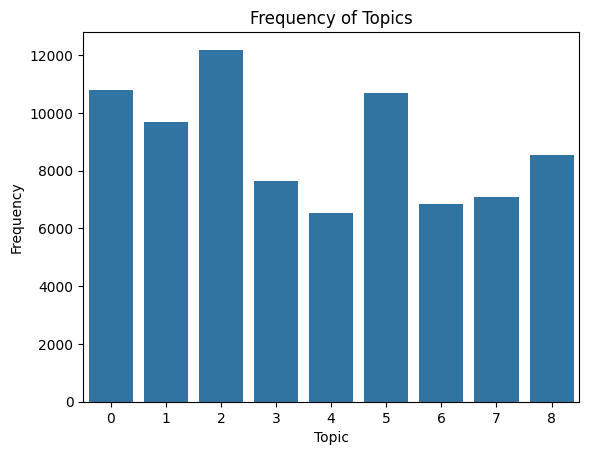

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=topic_distribution2.index, y=topic_distribution2.values)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()

**5. Discussion**

The dataset used in this assignment was a collection of consumer complaints for the Consumer Financial Protection Bureau.  The dataset had almost 80,000 reported complaints.  The complaints were preprocessed where all special characters were removed, letters were converted to lowercase, stop words were removed, and the complaints were vectorized.  After the data was properly prepared, Latent Dirichlet Allocation (LDA) was used to perform topic modeling.
Once topic modeling was complete using 10 topics, grid search was used to find the best number of topics for the dataset.  I attempted to use a range of 2-10 topics, but the execution time was extremely long.  From testing 3, 5, 7, and 9, the completion time was just under an hour.  

Overall, the topic distribution appears to be relatively even.  In the first iteration of topic modeling using 10 topics, topics 0, 2, and 5 were the most frequent.  These three topics have topic words such as breach, authorized, concerning, and congress.  Breach, authorized, and concerning might suggest the complaints are about the methodologies used to obtain the information.  Congress might suggest the consumers are mentioning congress due to the questionable methods as well.